# 台灣出國人數

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
import datetime
from matplotlib import offsetbox
from matplotlib.offsetbox import OffsetImage
from matplotlib.offsetbox import AnnotationBbox
import matplotlib.image as mpimg # mpimg用於讀取圖片
#plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 中文字体设置-黑体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['animation.embed_limit'] = 2**128

#df = pd.read_excel('平滑旅遊資料.xlsx')
df = pd.read_excel('出國人數.xlsx')
df = df.iloc[np.where(df['月份'].str.contains('月')==True)[0],np.where(pd.Series(df.columns).str.contains('地區')==False)[0]].drop(235).drop(248)

In [2]:
df=pd.melt(df,id_vars=['月份'])
df.columns = ['月份','name','value']
df['group'] = df['name']
year=[str(int(i[:i.find('年')])+1911) for i in df['月份'].values]
month = [str(int(i[i.find('月')-2:i.find('月')].replace(' ',''))) for i in df['月份'].values]
df['月份']= [str(datetime.datetime.strptime(year[i]+'-'+month[i],'%Y-%m'))[0:10] for i in range(len(year))]

In [3]:
#df[df['name']=='香港']
df = df.pivot(index='name', columns='月份', values='value')

In [ ]:
df = pd.read_excel('旅遊資料.xlsx')[1:25]
col = list(df.columns)
col[0] = '地區'
col[1:] = year
df.columns = col
df = df[df['地區'].str.contains('地區')==False]
df['地區'].values[0] = '港澳'

In [19]:
new_year = list(df.columns.values)[1:]
new_year.sort()

In [ ]:
x = [ i.replace('年','').replace('月','') for i in list(df.columns)[1:] ]
year = [ str(int(i[:i.find(' ')].replace(' ',''))+1911)+'-'+str(i[i.find(' ')+1:]) for i in x ]

In [ ]:
import datetime
dd = ''
count = 0
multiple = 1
while dd != '2019-11-01':
    dd = str(datetime.datetime.strptime(list(df.columns)[0],'%Y-%m-%d') + datetime.timedelta(days=count))[:10]
    count += 1
    base1 = dd[:7] +'-01'
    if(dd[5:7]=='12'):
        base2 = dd[:3] + str(int(dd[3])+1) +'-01-01'
    elif(dd[6]=='9'):
        base2 = dd[:5] + '10-01'
    else:
        base2 = dd[:6] + str(int(dd[6])+1) +'-01'
    if(base2[2:5]=='010'):
        base2 = base2[:2]+'10'+base2[5:]

    if(sum(df.columns.isin([dd]))!=1):
        space = np.floor((df[base2] - df[base1])/30)
        df[dd] = df[base1] + space*multiple
        multiple +=1
    else:
        multiple = 1
    print(dd)

In [ ]:
df

In [5]:
### 再翻正
df['name'] = df.index
df = pd.melt(df,id_vars=['name'])
df['group'] = df['name']
df.columns = ['name','月份','value','group']

In [ ]:
df.to_csv('平滑出國旅遊資料.csv',encoding='UTF_8_SIG',index_label=False)

In [10]:
x = [ i.replace('年','').replace('月','') for i in list(df.columns)[1:] ]
year = [ str(int(i[:i.find(' ')].replace(' ',''))+1911)+'-'+str(i[i.find(' ')+1:]) for i in x ]

In [6]:
colors = dict(zip(
    ["香港", "中國大陸", "日本", "南韓", "馬來西亞", "新加坡", "印尼","菲律賓","泰國","越南","加拿大","美國","法國","德國","義大利","荷蘭","英國","澳大利亞","南非",'澳門'],
    ["#2E86AB", "#424B54", "#00A6A6", "#F24236", "#9E643C", "#f7bb5f", "#EDE6F2","#E9D985", "#8C4843", "#90d595", "#e48381", "#090446", "#f7bb5f", "#eafb50","#adb0ff",
     "#ffb3ff", "#90d595", "#e48381", "#aafbff",'#746D75']
))
group_lk = df.set_index('name')['group'].to_dict()

In [290]:
dff = df[df['月份'].eq('2014-10-01')].sort_values(by='value', ascending=True).tail(10)
dx = dff['value'].max() / 200
for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
    print(i,value,dx,name)
    ax.text(0, i,name+' ',size=16, weight=600, ha='right', va='center')
    ax.text(value+dx, i,f'{value:,.0f}',  size=16, ha='left',  va='center')

0 16021.0 1514.93 馬來西亞
1 22556.0 1514.93 新加坡
2 26877.0 1514.93 越南
3 32289.0 1514.93 美國
4 39632.0 1514.93 泰國
5 42147.0 1514.93 澳門
6 56795.0 1514.93 南韓
7 173328.0 1514.93 香港
8 270304.0 1514.93 日本
9 302986.0 1514.93 中國大陸


In [31]:
plt.rcParams ["figure.dpi" ] = 75
plt.rcParams ["figure.dpi" ]

75.0

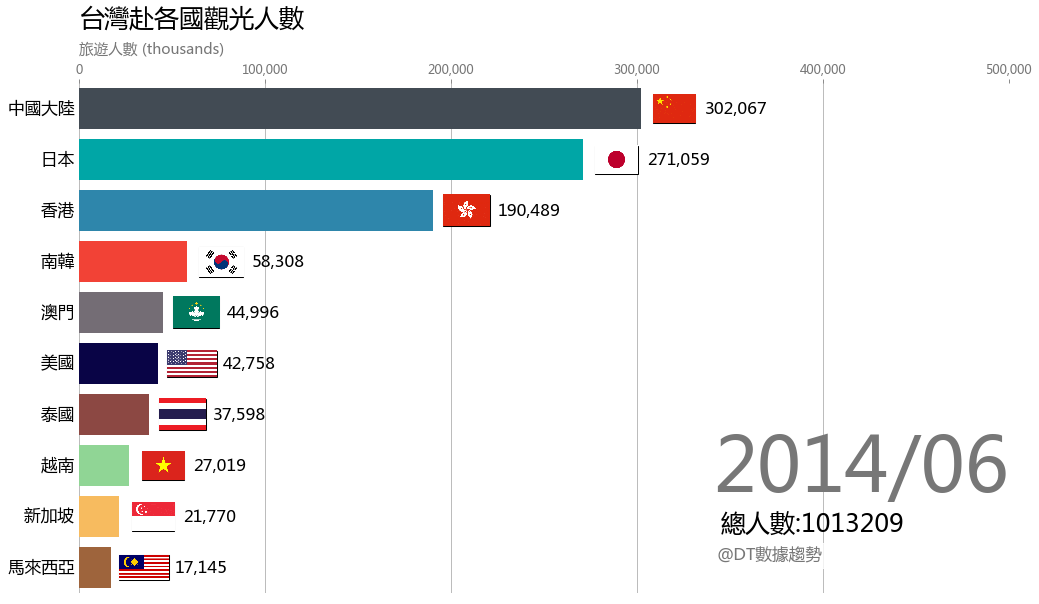

In [33]:
fig, ax = plt.subplots(figsize=(16, 9))
china = mpimg.imread('fig//中國大陸.png')
japen = mpimg.imread('fig//日本.png')
usa = mpimg.imread('fig//美國.png')
korea =  mpimg.imread('fig//南韓.png')
new =  mpimg.imread('fig//新加坡.png')
ma =  mpimg.imread('fig//馬來西亞.png')
macao =  mpimg.imread('fig//macao.png')
hongkong = mpimg.imread('fig//hongkong.png')
vietnam = mpimg.imread('fig//越南.png')
indonesia = mpimg.imread('fig//印尼.png')
philippines = mpimg.imread('fig//菲律賓.png')
thailand = mpimg.imread('fig//泰國.png')
nederland = mpimg.imread('fig//nederland.png')
canada = mpimg.imread('fig//canada.png')
australia = mpimg.imread('fig//australia.png')
each_bar = {'中國大陸':[0.18,china,1],'日本':[0.18,japen,1],
            '美國':[0.16,usa,0.7],'南韓':[0.19,korea,1],
            '新加坡':[0.18,new,1],'馬來西亞':[0.16,ma],
            '越南':[0.18,vietnam],'印尼':[0.18,indonesia],
            '菲律賓':[0.15,philippines],'泰國':[0.18,thailand],
            '香港':[0.14,hongkong,0.7],'澳門':[0.14,macao],
            '加拿大':[0.16,canada,0.75],'荷蘭':[0.18,nederland],'澳大利亞':[0.16,australia]}

def draw_barchart(current_year):
    dff = df[df['月份'].eq(current_year)].sort_values(by='value', ascending=True).tail(10)
    ax.clear()

    ax.barh(dff['name'], dff['value'], color=[colors[group_lk[x]] for x in dff['name']],height=0.8)
    dx = dff['value'].max() / 200
    
    max_name = dff.iloc[np.where(dff['value']==dff['value'].max())[0][0],:]['name']
    arr_lena1 = each_bar[max_name][1]
    zoo1 = each_bar[max_name][2]
    
    for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
        ax.text(0, i,name+' ',size=16, weight=600, ha='right', va='center')
        ax.text(value+dx+33000, i,f'{value:,.0f}',  size=16, ha='left',  va='center')
        zoo = each_bar[name][0]
        arr_lena = each_bar[name][1]
        imagebox = OffsetImage(arr_lena, zoom=zoo,alpha=1)
        ab = AnnotationBbox(imagebox, (value+18000,i),pad=0)
        ax.add_artist(ab)
            
    #imagebox = OffsetImage(arr_lena1, zoom=zoo1,alpha=0.7)
    #ac = AnnotationBbox(imagebox, (410000,5),pad=0)
    #ax.add_artist(ac)

    ax.text(1, 0.2, current_year[:7].replace('-','/'), transform=ax.transAxes, color='#777777', size=72, ha='right', weight=1000)
    ax.text(0, 1.06, '旅遊人數 (thousands)', transform=ax.transAxes, size=14, color='#777777')
    ax.text(0.69, 0.12, '總人數:'+str(int(dff['value'].sum())), transform=ax.transAxes, size=24, color='#000000')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.set_xlim(0,500000)
    ax.set
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.15, '台灣赴各國觀光人數',
                transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    ax.text(0.8, 0.065, '@DT數據趨勢', transform=ax.transAxes, color='#777777', ha='right',size=16,
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))

    plt.box(False)
    #plt.figure(dpi=1500)
    
draw_barchart('2014-06-01')
#draw_barchart('2019-11-01')

In [9]:
#確定劃格數
new_year = list(set(df['月份'].values))
new_year.sort()

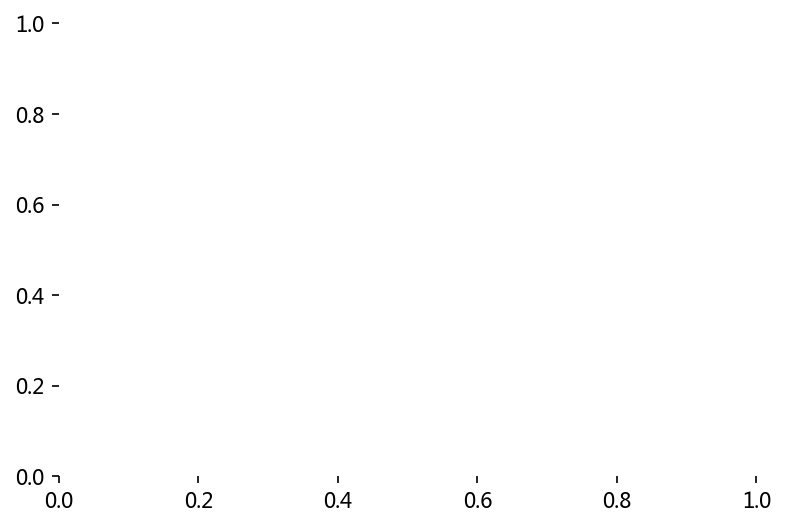

In [30]:
animator = animation.FuncAnimation(fig, draw_barchart, frames=new_year)
#HTML(animator.to_jshtml())
#animator.save("條竟.gif",writer='imagemagick', fps=60)
animator.save("台灣赴各國旅遊人數2.mp4",fps=30)